In [116]:
#Import needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Reading the dataset
hr = pd.read_csv('HR_comma_sep (1).csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Data Exploratory Analysis

In [16]:
#Information about the dataset
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
#Checking the missing values 
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
#Using Muiltivariate analysis to check three columns relationship
ret = hr.groupby(['Department','salary'])['left'].value_counts().sort_values(ascending = False).head(20)
ret = pd.DataFrame(ret)
ret

left
Department  salary left      
sales       medium 0     1469
            low    0     1402
technical   low    0      994
            medium 0      853
support     medium 0      784
            low    0      757
sales       low    1      697
IT          medium 0      438
            low    0      437
support     low    1      389
technical   low    1      378
product_mng low    0      346
RandD       medium 0      310
            low    0      309
marketing   medium 0      308
sales       medium 1      303
product_mng medium 0      296
technical   medium 1      294
marketing   low    0      276
accounting  low    0      259

In [8]:
#Bivariate analysis of salary and left columns 
ret1 = hr.groupby('salary')['left'].value_counts().sort_values(ascending = False).head(20)
ret1 = pd.DataFrame(ret1)
ret1

left
salary left      
low    0     5144
medium 0     5129
low    1     2172
medium 1     1317
high   0     1155
       1       82

In [9]:
#Checking the unique values of the salary columns
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
#Chceking the the unique values of Department 
hr.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [19]:
hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Performing label encoding on salary column 

In [24]:
#importing LabelEncoder for transformation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
#Transforming slaray to numerical values 
hr['salary'] = le.fit_transform(hr['salary'].values)
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [38]:
hr.salary.unique()

array([1, 2, 0], dtype=int64)

In [47]:
#Comfirming the value counts of staff that left
ex_staff = (hr[hr.left==1].shape[0])
ex_staff

3571

In [50]:
#Confirming the value counts of staff that were retained
ret_staff = (hr[hr.left==0].shape[0])
ret_staff

11428

In [51]:
#Retrieving the number of low salary earners that retained
low_salarystaff = (hr[hr.salary ==1].shape[0])
low_salarystaff

7316

In [57]:
#Retrieving the number of medium salary earners that retained
med_salarystaff = (hr[hr.salary ==2].shape[0])
med_salarystaff

6446

In [58]:
##Retrieving the number of high salary earners that retained
high_salarystaff = (hr[hr.salary == 0].shape[0])
high_salarystaff

1237

<AxesSubplot:xlabel='left', ylabel='count'>

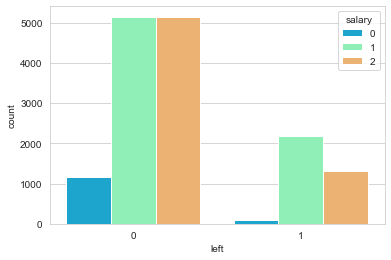

In [60]:
#Visualizing the dataset for those that left interms of salary

sns.set_style('whitegrid')
sns.countplot(x = 'left', hue = 'salary', data = hr, palette = 'rainbow')

This graph above shows that the number of staff that were retained are higher than those that left even the low and medium salary earners stayed back more. Here, 0-label represents high_salary,
1-label represents low salary earners while 2-label represents medium salary earners. 

In [61]:
#Checking the value counts against salary and left by grouping 

salary_left = hr.groupby('salary')['left'].value_counts()
salary_left

salary  left
0       0       1155
        1         82
1       0       5144
        1       2172
2       0       5129
        1       1317
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

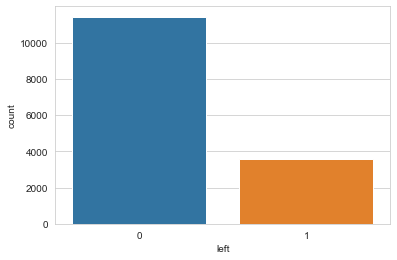

In [65]:
#Plotting graph to see the retained and left staff

sns.countplot(x = 'left', data = hr)

In [ ]:
#The graph above shows that stayed back are more than those that left.

Question
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [39]:
#Selecting all the columns with numerical values 
hr_numeric_features = hr.select_dtypes(include=[np.number])
hr_numeric_features

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,1


In [40]:
# checking the statistical summary of the dataset 
hr_numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary,14999.0,1.347290,0.625819,0.00,1.00,1.00,2.00,2.0


### Questions

#### 1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

<AxesSubplot:>

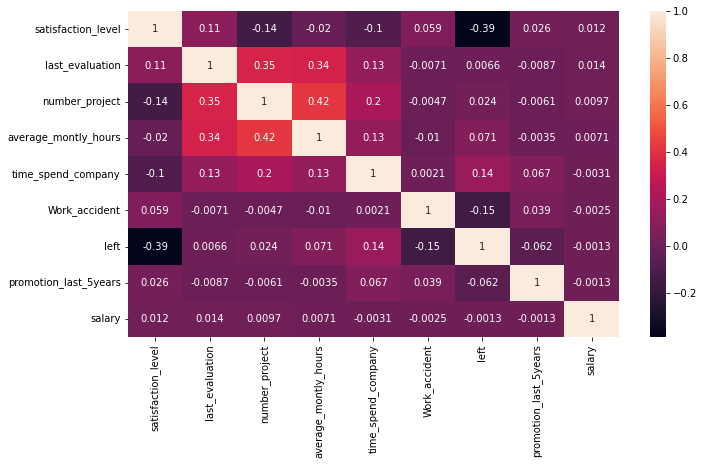

In [41]:
corr = hr.corr()
corr
plt.figure(figsize =(11, 6))
sns.heatmap(corr, annot = True)

#### 2. Plot bar charts showing impact of employee salaries on retention

<AxesSubplot:xlabel='salary'>

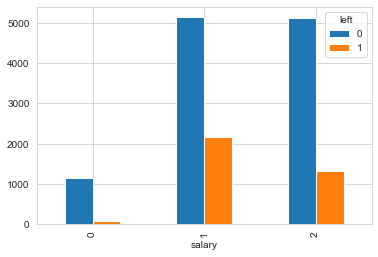

In [69]:
#Plotting chart to show impact of employee salaries on retention
pd.crosstab(hr['salary'],hr['left']).plot(kind = 'bar')

Here, the barchart above shows that the impact of  employee's retention was based on their salary earnings. Those that earned 
the lowest salary left more followed by those that earned the medium salary 
while those that earned high salary didn't leave much.

Comment:The bar chart also revealed that employees with high salaries are not likely to leave the company. There is a correlation between employees retention and salaries

#### 3. Plot bar charts showing corelation between department and employee retention

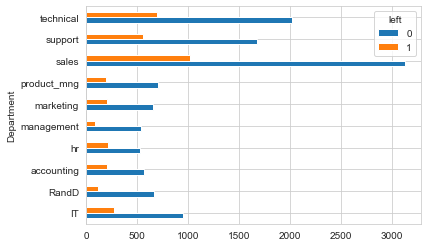

In [81]:
#Plotting barcharts showing corelation between department and employee retention
pd.crosstab(hr.Department, hr.left).plot(kind = 'barh');

#Comment: The bar chart above revealed that the sales department has the highest number of employees turnover and it also has the highest number of employees that didn't leave the organisation. However, Hr and management department have the lowest number of employees turnover and the least number of employees in the company. There is no correlation between the departments and employees retention because all the departments has people that left the company, therefore, department does not determine employees retention.

#### 4. Now build logistic regression model using variables that were narrowed down in step 1

In [99]:
#Extracting the independent variables 
x = hr.drop(columns =['left', 'Department'])
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1
14995,0.37,0.48,2,160,3,0,0,1
14996,0.37,0.53,2,143,3,0,0,1
14997,0.11,0.96,6,280,4,0,0,1


In [100]:
# Extarcting the dependent variable
y = hr.left
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [101]:
#Splitting the dataset into train and test for our model building 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [102]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
1209,0.10,0.93,6,243,4,0,0,1
38,0.11,0.89,6,306,4,0,0,1
13387,0.65,1.00,4,229,4,0,0,1
10053,0.62,0.54,4,212,4,0,0,2
14885,0.45,0.53,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
221,0.37,0.50,2,135,3,0,0,1
14303,0.42,0.48,2,143,3,0,0,1
10448,0.94,0.89,4,192,2,0,0,1
14345,0.36,0.50,2,132,3,0,0,1


In [103]:
y_test

1398     1
11580    0
11248    0
12455    1
391      1
        ..
11875    0
2248     0
11014    0
13461    0
2889     0
Name: left, Length: 3000, dtype: int64

In [104]:
#Creating Logistic Object for modeling 
hr_model = LogisticRegression()

In [108]:
#Fitting in the dataset for the model building 
model_fit = hr_model.fit(x_train, y_train)
model_fit

C:\Users\obianujunwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
#Predicting the model
model_prediction = model_fit.predict(x_test)
model_prediction

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [111]:
#Checking the class probability of the model
model_fit.predict_proba(x_test)

array([[0.54713791, 0.45286209],
       [0.28271136, 0.71728864],
       [0.80290162, 0.19709838],
       ...,
       [0.49186532, 0.50813468],
       [0.58214924, 0.41785076],
       [0.9854089 , 0.0145911 ]])

#### 5. Measure the accuracy of the model

In [114]:
#1 Measuring the accuracy of the model 

model_fit.score(x_test , model_prediction)

1.0

In [115]:
# 2 Checking the accuracy of the model
model_fit.score(x, y)

0.764317621174745

In [119]:
#Using Confusion matrix to also test the accuracy of the model

con_test = confusion_matrix(y_test, model_prediction)
con_test

array([[2153,  180],
       [ 495,  172]], dtype=int64)

<AxesSubplot:>

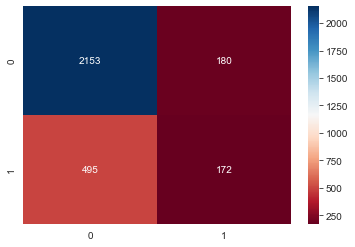

In [123]:
#Visualizing the performance of the model
sns.heatmap(con_test, annot = True, cmap = 'RdBu', fmt = 'd')

#Therefore, the performance score of the model is 0.775 
i.e Selecting the values on the diagonal axis, 2153 + 172 = 2325/3000
= 0.775 
which is 77.5% accuracy